Inventory Analysis

In [9]:
# Import dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
#import random
from scipy.stats import pearsonr
from datetime import datetime
from statistics import mean


In [10]:
#Read the data from file
path =('data/cleandata.csv')
clean_df=pd.read_csv(path)
list(clean_df)
clean_df.dtypes

City                      object
State                     object
Month                     object
Median Sale Price        float64
Median Sale Price MoM    float64
Homes Sold                 int64
Inventory                  int64
Inventory MoM            float64
Days on Market             int64
Days on Market MoM         int64
Average Sale To List     float64
dtype: object

In [11]:
clean_df.head()

,City,State,Month,Median Sale Price,Median Sale Price MoM,Homes Sold,Inventory,Inventory MoM,Days on Market,Days on Market MoM,Average Sale To List
0,Austin,Texas,2012-02-29,190.0,5.6,1403,6941,1.2,74,0,96.7
1,Austin,Texas,2012-03-31,200.0,5.1,2076,7394,6.5,58,-16,97.3
2,Austin,Texas,2012-04-30,205.0,2.7,2120,7698,4.1,39,-19,97.7
3,Austin,Texas,2012-05-31,210.0,2.4,2584,7908,2.7,36,-3,97.6
4,Austin,Texas,2012-06-30,214.0,2.0,2842,8152,3.1,31,-5,97.8


In [12]:
#Define values for plots

Austin=clean_df.loc[clean_df["City"]=='Austin']
Dallas=clean_df.loc[clean_df["City"]=='Dallas']

Austin.to_csv('Austin_data.csv', index=0)
Dallas.to_csv('Dallas_data.csv', index=0)

#Define timeframe
index=clean_df.loc[clean_df["City"]=='Austin','Month']
index1=[data for data in index]
Austin=pd.read_csv('Austin_data.csv')

In [13]:
#Define values for scatter plot
variables=['Days on Market','Inventory','Median Sale Price']
Austin=pd.read_csv('Austin_data.csv')
Dallas=pd.read_csv('Dallas_data.csv')
x_val=[]
y_val=[]
for variable in variables:
    x_val=Austin[variable]
    y_val=Dallas[variable]
    
   #Correlation between variables
    correl, _=pearsonr(x_val,y_val)
    print(f"The correlation between {variable} in Austin and Dallas  is {correl:.3f}")

The correlation between Days on Market in Austin and Dallas  is 0.658
The correlation between Inventory in Austin and Dallas  is 0.696
The correlation between Median Sale Price in Austin and Dallas  is 0.981


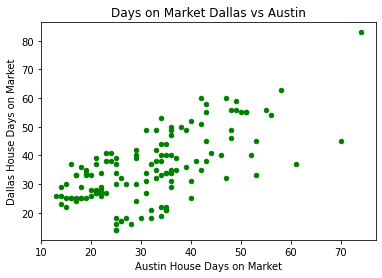

<Figure size 7200x5040 with 0 Axes>

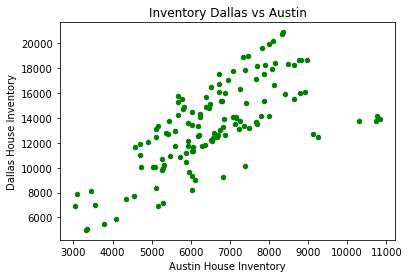

<Figure size 7200x5040 with 0 Axes>

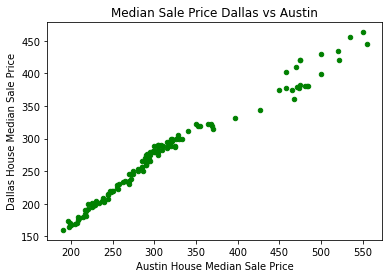

<Figure size 7200x5040 with 0 Axes>

In [14]:
#Scatter graphs for Austin and Dallas
x_val=[]
y_val=[]
for variable in variables:
    
    x_val=Austin[variable]
    y_val=Dallas[variable]

    df=pd.DataFrame({'Austin':x_val,'Dallas':y_val})
    df.plot.scatter(x='Austin', y='Dallas',c="green")
    
    plt.title(f'{variable} Dallas vs Austin')
    plt.xlabel(f'Austin House {variable}')
    plt.ylabel(f"Dallas House {variable}")
    
    # Save the figure
    plt.savefig(f"Scatter_plot_{variable}.png")
    
    #Display the figure
    plt.figure(figsize= (100,70));
    

In [15]:
#Average on Inventories
cities=["Austin","Dallas"]

freq=12    #3 quarter, 6 semester, 12 annual
x_val_1=[]
y_val_1=[]
q_dates=[]
temp=0
cont=0

for  index, row in Austin.iterrows():
    temp = temp + row['Inventory']  
    cont+=1
    if cont==freq:
        x_val_1.append(temp)
        q_dates.append(row['Month'])
        cont=0
        temp=0

temp=0
cont=0

for  index, row in Dallas.iterrows():
    temp = temp + row['Inventory']  
    cont+=1
    if cont==freq:
        y_val_1.append(temp)
        cont=0
        temp=0


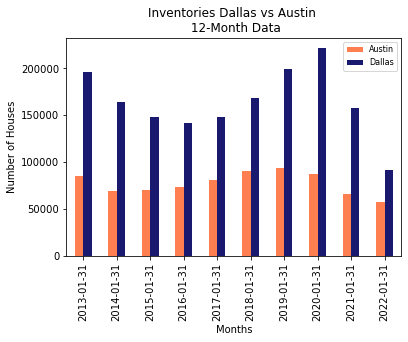

<Figure size 7200x5040 with 0 Axes>

In [16]:
#Displaying bar graphs

bar_df = pd.DataFrame({'Month': q_dates, 'Austin': x_val_1,'Dallas': y_val_1})
bargraph = bar_df.plot(x="Month", y=["Austin", "Dallas"], kind="bar",color=['coral','midnightblue'])

frequency =f'{freq}-Month Data'
plt.title(f'Inventories Dallas vs Austin \n {frequency}', fontsize=12)
plt.xlabel('Months',fontsize=10)
plt.ylabel("Number of Houses",fontsize=10)
plt.legend(fontsize=8)

# Save the figure
plt.savefig("images/Bar_graph_Inventory.png")
plt.figure(figsize= (100,70));

#colors = ['coral','midnightblue']